In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, SpatialDropout2D, BatchNormalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.utils import load_img, img_to_array, to_categorical
from tensorflow.keras.regularizers import L1L2, L1
from tensorflow.keras.initializers import LecunNormal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os
import random

In [ ]:
labels = ["NORMAL", "PNEUMONIA"]
img_size = 150

In [ ]:
def get_train_data(data_dir):
  data = []
  for label in labels:
    path = os.path.join(data_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
      try:
        img_res = load_img(os.path.join(path, img), color_mode="grayscale", target_size=(img_size, img_size))
        img_arr = img_to_array(img_res)
        data.append([img_arr, class_num])
      except Exception as e:
        print(e)
  return np.array(data, dtype="object")

In [ ]:
train = get_train_data("/content/drive/MyDrive/data/train")
test = get_train_data("/content/drive/MyDrive/data/test")
val = get_train_data("/content/drive/MyDrive/data/val")

In [ ]:
np.random.shuffle(train)
np.random.shuffle(val)
np.random.shuffle(test)

In [ ]:
data = np.concatenate([train, val])

In [ ]:
zoom = RandomZoom(0.2, 0.2)
rotation = RandomRotation(0.3)
flip = RandomFlip("horizontal")

In [ ]:
func = [zoom, rotation, flip]

In [ ]:
new_data = []
for i in data:
  if i[1] == 0:
    x = random.choice(func)(i[0])
    new_data.append([x, i[1]])

<Axes: xlabel='count'>

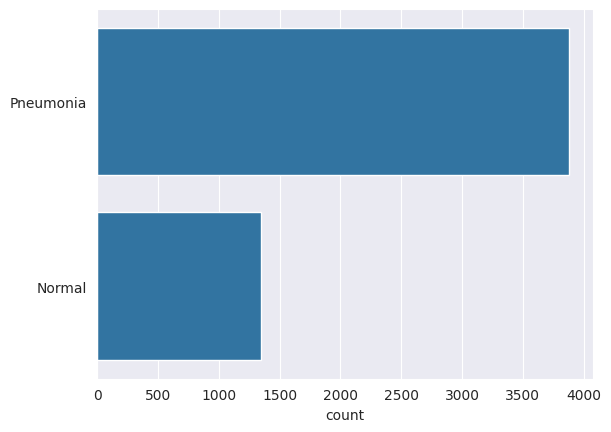

In [ ]:
l = []
for i in data:
    if(i[1] == 1):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

In [ ]:
new_data = np.array(new_data, dtype="object")

In [ ]:
data_e = np.concatenate([new_data, data])

<Axes: xlabel='count'>

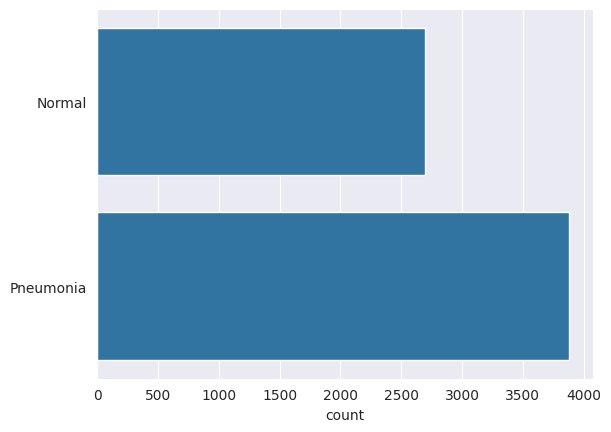

In [ ]:
l = []
for i in data_e:
    if(i[1] == 1):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

In [ ]:
np.random.shuffle(data_e)

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in data_e:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_val, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
LecunNormal(seed=None)

In [ ]:
initKernel = LecunNormal()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), strides=1, padding="same", activation="leaky_relu", kernel_initializer=initKernel, input_shape=(150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(64, (5, 5), strides=1, padding="same", activation="leaky_relu", kernel_initializer=initKernel, kernel_regularizer=L1(l1=1e-5)))
model.add(SpatialDropout2D(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(64, (5, 5), strides=1, padding="same", activation="leaky_relu", kernel_initializer=initKernel, kernel_regularizer=L1(l1=1e-5)))
model.add(SpatialDropout2D(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="leaky_relu", kernel_initializer=initKernel, kernel_regularizer=L1(l1=1e-5)))
model.add(SpatialDropout2D(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="leaky_relu", kernel_initializer=initKernel, kernel_regularizer=L1(l1=1e-5)))
model.add(SpatialDropout2D(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="leaky_relu", kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_90 (Conv2D)                   │ (None, 150, 150, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_90               │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_90 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 75, 75, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_72                 │ (None, 75, 75, 64)          │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_91               │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_91 (MaxPooling2D)      │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_92 (Conv2D)                   │ (None, 38, 38, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_73                 │ (None, 38, 38, 64)          │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_92               │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_92 (MaxPooling2D)      │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_93 (Conv2D)                   │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_74                 │ (None, 19, 19, 128)         │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_93               │ (None, 19, 19, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_93 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_94 (Conv2D)                   │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_75                 │ (None, 10, 10, 256)         │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,345,346 (5.13 MB)

 Trainable params: 1,344,258 (5.13 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=4)

Epoch 1/4
206/206 ━━━━━━━━━━━━━━━━━━━━ 28s 81ms/step - accuracy: 0.8226 - loss: 1.4133
Epoch 2/4
206/206 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9444 - loss: 0.4388
Epoch 3/4
206/206 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9509 - loss: 0.4210
Epoch 4/4
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9612 - loss: 0.3558


In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7492 - loss: 1.6294
Loss of the model is -  1.5931110382080078
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7492 - loss: 1.6294
Accuracy of the model is -  74.5192289352417 %


In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y = []
for i in y_test:
  y.append(np.argmax(i))

In [ ]:
print(classification_report(y, predictions, target_names = ['Норма (Class 0)', 'Пневмония (Class 1)']))

                     precision    recall  f1-score   support

   Normal (Class 0)       0.90      0.82      0.86       234
Pneumonia (Class 1)       0.90      0.95      0.92       390

           accuracy                           0.90       624
          macro avg       0.90      0.89      0.89       624
       weighted avg       0.90      0.90      0.90       624



In [ ]:
cm = confusion_matrix(y,predictions)
cm

array([[193,  41],
       [ 21, 369]])

In [ ]:
model.export("/content/drive/MyDrive/res/sysitnOriginal4")

Saved artifact at '/content/drive/MyDrive/res/sysitnOriginal4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 1), dtype=tf.float32, name='keras_tensor_2770')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  139387247538976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139387823216016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139387827322224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139387827322400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139387827321520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139387827313424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139387827309200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139387827314832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139387828011424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139387828025680: TensorSpec(shape=(), dtype=tf.resour

In [ ]:
model.save("/content/drive/MyDrive/res/sysitnOriginal4.keras")

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/res/sysitnOriginal4.keras")

In [ ]:
import cv2

In [ ]:
import numpy as np

In [ ]:
image = cv2.imread("/content/drive/MyDrive/data/test/NORMAL/IM-0001-0001.jpeg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (150, 150))
img = np.array(image) / 255

In [ ]:
model.predict(np.array([img]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.99853814, 0.00146192]], dtype=float32)